In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.special import spherical_jn as jl
from scipy.special import spherical_yn as nl
from scipy.signal import argrelextrema

In [3]:
X=[0.5,0.1,0.01,0.001]

## Approximation
### $\sigma_{total}\simeq4 \pi R^2 \big( \frac{\tan(\sqrt V)}{\sqrt{V}}-1 \big)^2$ 

### Where $ V= \sqrt{\frac{2m R^2}{\hbar^2} V_0}$

### Approximation

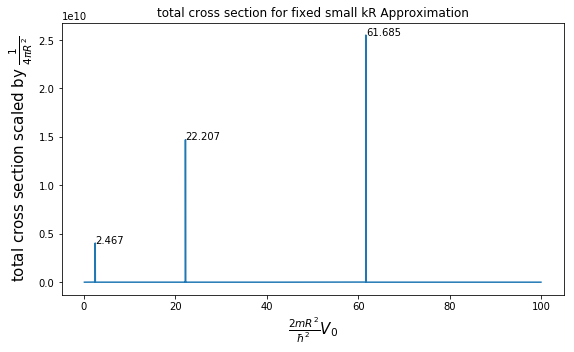

In [4]:
V=linspace(0.1,100,1000000)
Tcs=(tan(sqrt(V))/sqrt(V)-1)**2
figure(figsize=(9,5))
plot(V,Tcs)
xlabel(r'$\frac{2m R^2}{\hbar^2} V_0$',fontsize=15)
ylabel(r'total cross section scaled by $\frac{1}{4 \pi R^2}$',fontsize=15)
title(r'total cross section for fixed small kR Approximation')
locmax=argrelextrema(Tcs, greater)[0]
Vp=array([V[i] for i in locmax])
for k in range(len(Vp)):
    i=locmax[k]
    text(V[i],Tcs[i],'%s'%round(V[i],3))
show()

###  When $\sqrt{\frac{2m R^2}{\hbar^2} V_0}=\frac{n \pi}{2}$ n is an odd positive integer, the total cross section reaches the peak and blows up (diverges).

### Examine the postion of the peak

In [5]:
around(2*sqrt(Vp)/pi,4)

array([1., 3., 5.])

### Analytic plotting 

In [6]:
def dl(X,Xp):
    jlp=jl(0,X,derivative=True)
    jlpp=jl(0,Xp,derivative=True)
    jlx=jl(0,X)
    jlxp=jl(0,Xp)
    nlx=nl(0,X)
    nlp=nl(0,X,derivative=True)
    return arctan((X*jlp*jlxp-Xp*jlpp*jlx)/(X*nlp*jlxp-Xp*jlpp*nlx))

In [7]:
def sct(xx):
    for i in range(len(xx)):
        x=xx[i]
        V=linspace(0.1,100,100000)
        Tcs=[]
        for j in range(len(V)):
            xp=sqrt(x**2+V[j])
            Tcs.append(sin(dl(x,xp))**2/x**2)
        Tcs=array(Tcs)
        figure(i)
        figure(figsize=(9,5))
        plot(V,Tcs)
        xlabel(r'$\frac{2m R^2}{\hbar^2} V_0$',fontsize=15)
        ylabel(r'total cross section scaled by $\frac{1}{4 \pi R^2}$',fontsize=15)
        title(r'total cross section for fixed small kR=%s'%x)
        locmax=argrelextrema(Tcs, greater)[0]
        Vp=[V[i] for i in locmax]
        for k in range(len(Vp)):
            i=locmax[k]
            text(V[i],Tcs[i],'%s'%round(V[i],3))
    show()

<Figure size 432x288 with 0 Axes>

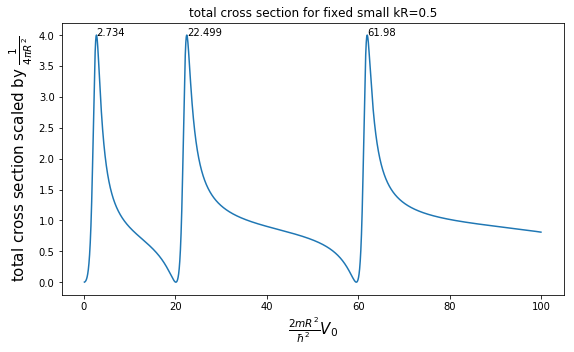

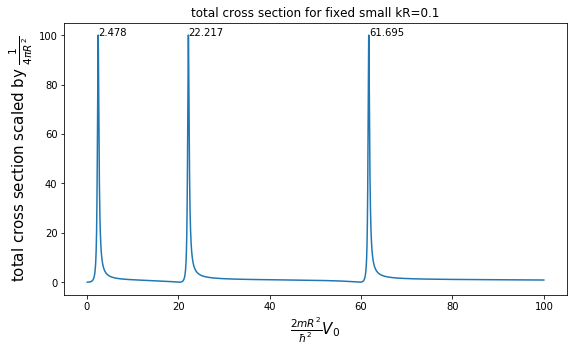

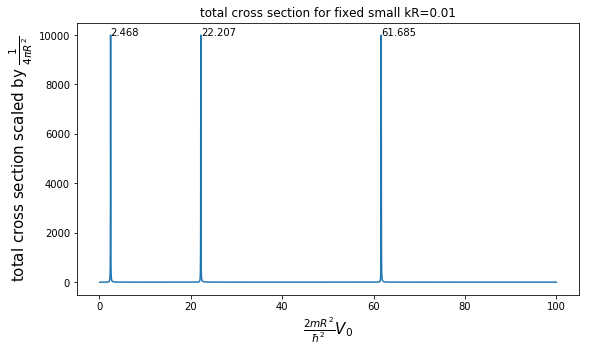

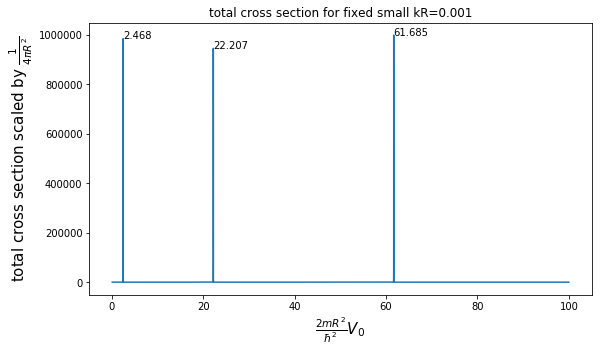

In [8]:
sct(X)

### As the  plot shows, As the decrease of kR, the postion of the peaks approaches to the approximation and the amplitude of total cross section increase.